In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [10]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
x, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [11]:
from sklearn.cluster import KMeans

k=5
kmeans=KMeans(n_clusters=5)
ypred=kmeans.fit_predict(x)

In [12]:
ypred

array([0, 3, 1, ..., 2, 1, 3])

In [13]:
ypred is kmeans.labels_

True

In [14]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348]])

In [15]:
xnew=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(xnew)

array([1, 1, 2, 2])

In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

<ipython-input-16-afc4f472c47c>:25: UserWarning: No contour levels were found within the data range.
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),


그림 저장: voronoi_plot


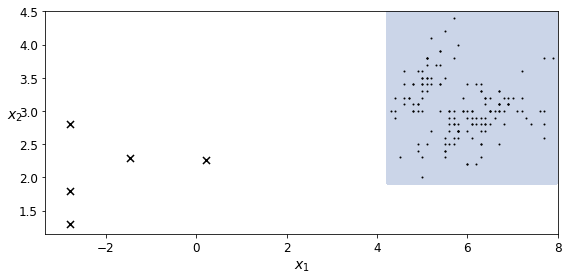

In [17]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

In [18]:
kmeans.transform(xnew)

array([[2.88633901, 0.32995317, 2.9042344 , 2.81093633, 1.49439034],
       [5.84236351, 2.80290755, 5.84739223, 5.80730058, 4.4759332 ],
       [1.71086031, 3.29399768, 0.29040966, 1.21475352, 1.69136631],
       [1.21567622, 3.21806371, 0.36159148, 0.72581411, 1.54808703]])

In [19]:
from sklearn.cluster import MiniBatchKMeans

minik=MiniBatchKMeans(n_clusters=5)
minik.fit(x)

MiniBatchKMeans(n_clusters=5)

In [20]:
from sklearn.metrics import silhouette_score

silhouette_score(x,kmeans.labels_)

0.655517642572828

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

xd,yd=load_digits(return_X_y=True)

xtrain,xtest,ytrain,ytest=train_test_split(xd,yd)

In [22]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
logreg.score(xtest,ytest)

0.9688888888888889

In [30]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([
    ('kmeans',KMeans(n_clusters=50)),
    ('log_reg',LogisticRegression( max_iter = 10000))
    
])
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [31]:
pipeline.score(xtest,ytest)

0.9733333333333334

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid=dict(kmeans__n_clusters=range(2,100))
gridclf=GridSearchCV(pipeline,param_grid,cv=3,verbose=2)
gridclf.fit(xtrain,ytrain)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.8s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.8s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   1.9s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   1.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.9s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   2.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   4.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ............................. kmeans__n_clusters=6, total=   7.6s
[CV] kmeans__n_clusters=6 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ............................. kmeans__n_clusters=6, total=   7.6s
[CV] kmeans__n_clusters=7 ............................................


KeyboardInterrupt: 

In [34]:
nlabel=50

logreg=LogisticRegression( max_iter = 1000)
logreg.fit(xtrain[:nlabel],ytrain[:nlabel])

LogisticRegression(max_iter=1000)

In [35]:
logreg.score(xtest,ytest)

0.8355555555555556

In [44]:
k=50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(xtrain)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = xtrain[representative_digit_idx]

In [45]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [47]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(xtest, ytest)

0.16444444444444445